In [1]:
import numpy as np
from PIL import Image
import tensorflow as tf
import pathlib

In [2]:
classes = ['building', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [3]:
dataset_dir = pathlib.Path('../dataset')
dataset_test_dir = list(dataset_dir.glob('test/*'))

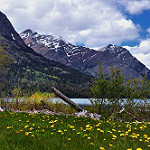

In [4]:
img1 = Image.open(str(dataset_test_dir[0]))
img1

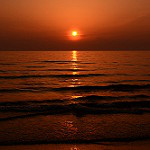

In [5]:
img2 = Image.open(str(dataset_test_dir[1]))
img2

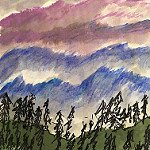

In [6]:
img3 = Image.open(str(dataset_test_dir[2]))
img3

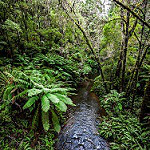

In [7]:
img4 = Image.open(str(dataset_test_dir[3]))
img4

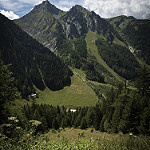

In [8]:
img5 = Image.open(str(dataset_test_dir[4]))
img5

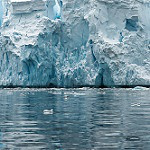

In [9]:
img6 = Image.open(str(dataset_test_dir[5]))
img6

In [10]:
interpreter = tf.lite.Interpreter(model_path='../static/model/model.tflite')
interpreter.allocate_tensors()

In [11]:
input_details = interpreter.get_input_details()
input_details

[{'name': 'serving_default_input_2:0',
  'index': 0,
  'shape': array([  1, 150, 150,   3]),
  'shape_signature': array([ -1, 150, 150,   3]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [12]:
output_details = interpreter.get_output_details()
output_details

[{'name': 'StatefulPartitionedCall:0',
  'index': 628,
  'shape': array([1, 6]),
  'shape_signature': array([-1,  6]),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [13]:
def predict(image):
    # [1 150 150 3]
    input_shape = input_details[0]['shape']
    input_data = tf.keras.utils.img_to_array(image).reshape(input_shape)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index']).reshape(6,)
    return classes[np.argmax(output_data)]

In [14]:
for i in range(6):
    print(predict(Image.open(str(dataset_test_dir[i]))))

mountain
sea
mountain
forest
mountain
glacier
